In [ ]:
#objective: Detect Occupancy through Light, Temperature, Humidity and CO2 sensors

In [1]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
df1 = pd.read_csv('../datasets/datatraining.csv', sep=",")
df2 = pd.read_csv('../datasets/datatest2.csv', sep=",")
#df1.columns = ['date','temp','humidity','light','co2','humidity_ratio','class']
#df2.columns = df1.columns

In [6]:
df1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/4/2015 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,2/4/2015 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,2/4/2015 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,2/4/2015 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,2/4/2015 17:55,23.10,27.2000,426.0,704.50,0.004757,1


In [38]:
from datetime import datetime

minute = lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M").minute
hour = lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M").hour

In [39]:
df1['minute'] = df1['date'].map(minute)
df1['hour'] = df1['date'].map(hour)

In [40]:
df2['minute'] = df2['date'].map(minute)
df2['hour'] = df2['date'].map(hour)

In [41]:
#remove bad data
#check for missing data
nan_rows = df1.isnull().T.any().T.sum()
#drop missing data
df1 = df1.dropna()
df1.shape

(8143, 9)

In [42]:
#remove bad data
#check for missing data
nan_rows = df2.isnull().T.any().T.sum()
#drop missing data
df2 = df2.dropna()
df2.shape

(9752, 9)

In [43]:
print(df1.columns.tolist())

['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy', 'minute', 'hour']


In [44]:
scaler = preprocessing.MinMaxScaler()
to_scale_df1 = df1[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'minute', 'hour']]
scaled_df1 = scaler.fit_transform(to_scale_df1)
scaled_df1 = pd.DataFrame(scaled_df1, columns=['Temperature', 'Humidity', 'Light', 'CO2', 
                                               'HumidityRatio', 'minute', 'hour'])
scaled_df1.reset_index(drop=True, inplace=True)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [45]:
scaler = preprocessing.MinMaxScaler()
to_scale_df2 = df2[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'minute', 'hour']]
scaled_df2 = scaler.fit_transform(to_scale_df2)
scaled_df2 = pd.DataFrame(scaled_df2, columns=['Temperature', 'Humidity', 'Light', 'CO2', 
                                               'HumidityRatio', 'minute', 'hour'])
scaled_df2.reset_index(drop=True, inplace=True)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [47]:
df1['Occupancy'].reset_index(drop=True, inplace=True)
df2['Occupancy'].reset_index(drop=True, inplace=True)

In [49]:
#combine data
df_train = pd.concat([scaled_df1,df1['Occupancy']], axis=1)
df_test = pd.concat([scaled_df2,df2['Occupancy']], axis=1)

In [51]:
df_train.shape

(8143, 8)

In [50]:
#data split
X_train = df_train.drop('Occupancy', axis=1)
y_train = df_train[['Occupancy']]
X_test = df_test.drop('Occupancy', axis=1)
y_test = df_test[['Occupancy']]

KNN: 0.947208 (0.037519)
CART: 0.968196 (0.049735)
SVM: 0.961438 (0.041617)
RF: 0.986254 (0.023961)
SGD: 0.962667 (0.049298)
GB: 0.970776 (0.034940)


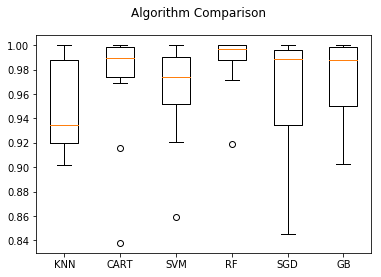

In [53]:
#design model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
#perform classification
array = df_train.values
X = array[:,0:7]
Y = array[:,7]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('GB', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [54]:
import warnings
warnings.simplefilter(action='ignore')
from sklearn.metrics import accuracy_score

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9634946677604594

In [55]:
#perform confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=["0", "1"],
    index=["0", "1"]
)

,0,1
0,7639,64
1,292,1757


In [57]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# load data
array = df_train.values
X = array[:,0:7]
Y = array[:,7]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(list(zip(model.feature_importances_,df_train.columns.tolist())))
print( )

[(0.09479798047855352, 'Temperature'), (0.05660784959459216, 'Humidity'), (0.4172514933367545, 'Light'), (0.30701732277753224, 'CO2'), (0.04274072466485248, 'HumidityRatio'), (0.010055170472163286, 'minute'), (0.07152945867555177, 'hour')]



In [58]:
#'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy', 'minute', 'hour']
df_train2 = df_train[['Temperature','Light','CO2','hour','Occupancy']]
df_test2 = df_test[['Temperature','Light','CO2','hour','Occupancy']]

In [59]:
#data split
X_train = df_train2.drop('Occupancy', axis=1)
y_train = df_train2[['Occupancy']]
X_test = df_test2.drop('Occupancy', axis=1)
y_test = df_test2[['Occupancy']]

KNN: 0.971634 (0.032343)
CART: 0.982690 (0.025658)
SVM: 0.964633 (0.045921)
RF: 0.978021 (0.030784)
SGD: 0.969422 (0.042108)
GB: 0.979498 (0.028920)


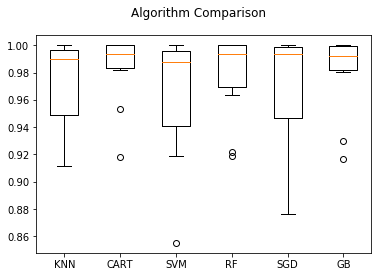

In [60]:
#design model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
#perform classification
array = df_train2.values
X = array[:,0:4]
Y = array[:,4]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('GB', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [61]:
import warnings
warnings.simplefilter(action='ignore')
from sklearn.metrics import accuracy_score

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9668785890073831

In [62]:
#perform confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=["0", "1"],
    index=["0", "1"]
)

,0,1
0,7655,48
1,275,1774
